In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import time

from IPython.display import display, clear_output

In [ ]:
class Aircraft:
    def __init__(self, x, y, spd, rocd):
        self.__x = x
        self.__y = y
        self.__spd = spd
        self.__rocd = rocd
    
    def move(self, step):
        self.__x -= step * self.__spd
        self.__y -= step * self.__rocd
        
    def data(self):
        return (self.__x, self.__y, self.__spd)

In [ ]:
class Visualization:    
    def __init__(self, time_step, speedup):
        self.__time_step = time_step
        self.__speedup = speedup
        self.__ac = Aircraft(14000, 1200, 80, 7)
        
        self.__fig = plt.figure(figsize=(13, 8))

        x_label = 'distance from threshold [m]'
        x_max = 15000
        
        self.__ax_alt_act = self.__subplot(221, x_label, 'altitude [m]', x_max, 1500)
        self.__ax_alt_est = self.__subplot(222, x_label, 'altitude [m]', x_max, 1500)
        self.__ax_spd_act = self.__subplot(223, x_label, 'speed [m/s]', x_max, 120)
        self.__ax_spd_est = self.__subplot(224, x_label, 'speed [m/s]', x_max, 120)
        
    def __subplot(self, pos, x_label, y_label, x_lim, y_lim):
        ax = self.__fig.add_subplot(pos) 
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xlim(0, x_lim)
        ax.set_ylim(0, y_lim)
        return ax
        
    def __animate(self, i):
        # TODO move simulation code to Simulator class and run in own thread, 
        #  then sync and get snapshot data here
        self.__ac.move(self.__time_step)

        (x,y,v) = self.__ac.data()

        if x < 0 or y < 0:
            self.__ani.event_source.stop()
        
        self.__ax_alt_act.plot(x, y, 'r+')
        self.__ax_spd_act.plot(x, v, 'bo')
        
    def start(self):
        self.__ani = animation.FuncAnimation(self.__fig, self.__animate, interval=int((1000*self.__time_step)/self.__speedup))
        plt.show()

<IPython.core.display.Javascript object>


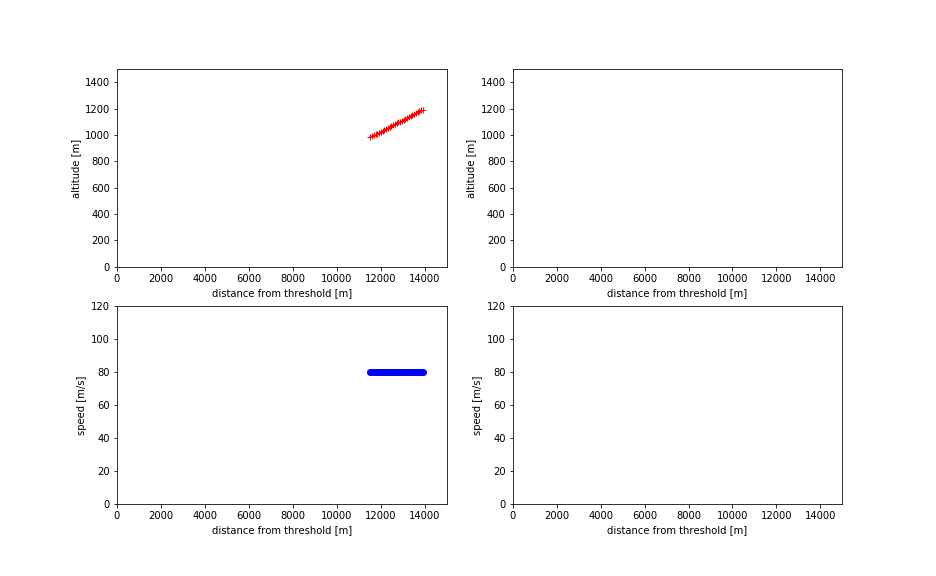

In [85]:
%matplotlib notebook

vis = Visualization(.5, 10)
vis.start()